In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
data1 = pd.read_csv('/content/data.csv')
data1

,"Marital status;Application mode;Application order;Course;""Daytime/evening attendance\t"";Previous qualification;Previous qualification (grade);Nacionality;Mother's qualification;Father's qualification;Mother's occupation;Father's occupation;Admission grade;Displaced;Educational special needs;Debtor;Tuition fees up to date;Gender;Scholarship holder;Age at enrollment;International;Curricular units 1st sem (credited);Curricular units 1st sem (enrolled);Curricular units 1st sem (evaluations);Curricular units 1st sem (approved);Curricular units 1st sem (grade);Curricular units 1st sem (without evaluations);Curricular units 2nd sem (credited);Curricular units 2nd sem (enrolled);Curricular units 2nd sem (evaluations);Curricular units 2nd sem (approved);Curricular units 2nd sem (grade);Curricular units 2nd sem (without evaluations);Unemployment rate;Inflation rate;GDP;Target"
0,1;17;5;171;1;1;122.0;1;19;12;5;9;127.3;1;0;0;1...
1,1;15;1;9254;1;1;160.0;1;1;3;3;3;142.5;1;0;0;0;...
2,1;1;5;9070;1;1;122.0;1;37;37;9;9;124.8;1;0;0;0...
3,1;17;2;9773;1;1;122.0;1;38;37;5;3;119.6;1;0;0;...
4,2;39;1;8014;0;1;100.0;1;37;38;9;9;141.5;0;0;0;...
...,...
4419,1;1;6;9773;1;1;125.0;1;1;1;5;4;122.2;0;0;0;1;1...
4420,1;1;2;9773;1;1;120.0;105;1;1;9;9;119.0;1;0;1;0...
4421,1;1;1;9500;1;1;154.0;1;37;37;9;9;149.5;1;0;0;1...
4422,1;1;1;9147;1;1;180.0;1;37;37;7;4;153.8;1;0;0;1...


In [ ]:
data = pd.read_csv('/content/data.csv', sep=';')
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


IndexError: ignored

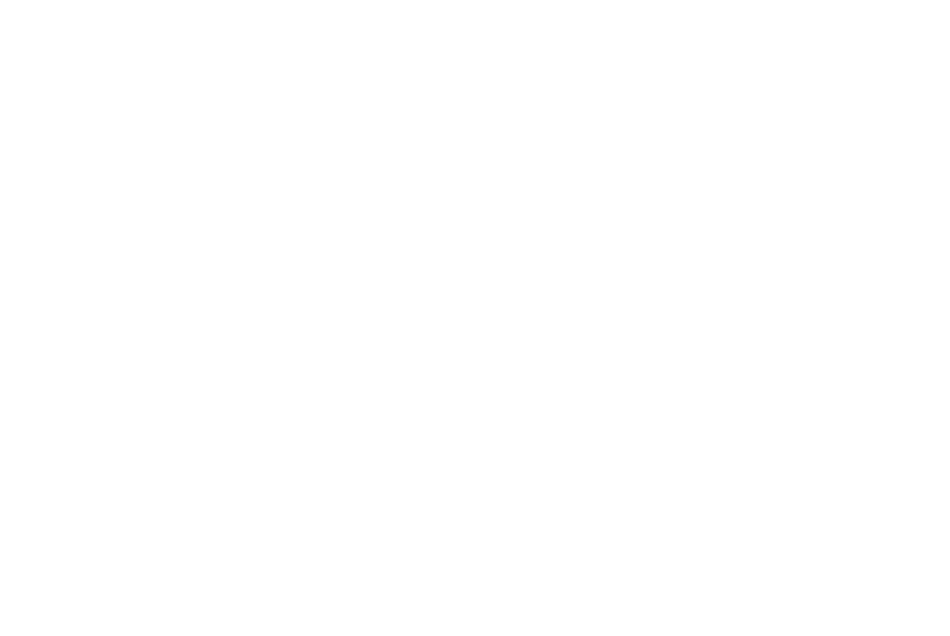

In [ ]:
attributes = ['Marital status','Application mode','Application order','Course,'"Daytime/evening attendance\t",'Previous qualification','Previous qualification (grade)','Nationality',"Mother's qualification","Father's qualification","Mother's occupation","Father's occupation",'Admission grade','Displaced','Educational special needs','Debtor','Tuition fees up to date','Gender','Scholarship holder','Age at enrollment','International','Curricular units 1st sem (credited)','Curricular units 1st sem (enrolled)','Curricular units 1st sem (evaluations)','Curricular units 1st sem (approved)','Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Curricular units 2nd sem (credited)','Curricular units 2nd sem (enrolled)','Curricular units 2nd sem (evaluations)','Curricular units 2nd sem (approved)','Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)','Unemployment rate','Inflation rate','GDP','Target']
description = ['The marital status of the student.)', 'The method of application used by the student.',
               'The order in which the student applied.', 'The course taken by the student.', 'Whether the student attends classes during evening.',
               'Qualification obtained by student before enrolling in higher education.', 'The nationality of the student.', 'The qualification of student’s mother.',
               'The qualification of student’s father.', 'The occupation of student’s mother.', 'The occupation of student’s father.',
               'Whether the student is a displaced person.', 'Whether the student has any special educational needs.', 'Whether the student is a debtor.','Whether the tuition fees are up to date.','The gender of the student','Whether the student is a scholarship holder.','Age of student at the time of enrollment','Whether the student is an international student.','Number of curricular units credited in the 1st semester','Number of curricular units enrolled in the 1st semester','Number of evaluations to curricular units in the 1st semester','Number of curricular units approved in the 1st semester',
               'Grade average in the 1st semester (between0 and 20)','Number of curricular units without evaluations in the 1st semester','Number of curricular units credited in the 2nd semester','Number of curricular units enrolled in the 2nd semester',
               'Number of evaluations to curicular units in the 2nd semester','Number of curricular units approved in the 1st semester','Grade average in the 2nd semester (between 0 and 20)','Number of curricular units without evaluations in the 2nd semester','Unemployment rate (%)','Inflation rate (%)','GDP','Dropout, Enrolled, or Graduate at the end of the nominal duration of the course']
cat_attrs = ["Marital Status",]
# Create the table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')  # Hide axis

table_data = []
for i in range(len(attributes)):
    table_data.append([attributes[i], description[i]])

table = ax.table(cellText=table_data, cellLoc='left', colLabels=['Attribute', 'Description'],
                 colColours=['#f5f5f5', '#f5f5f5'], cellColours=[['#f5f5f5']*2]*len(attributes),
                 loc='center')

table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 2)  # Adjust table size
plt.show()

In [ ]:
categorical_values = ['Marital status']

<ipython-input-7-d4c06531079b>:17: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


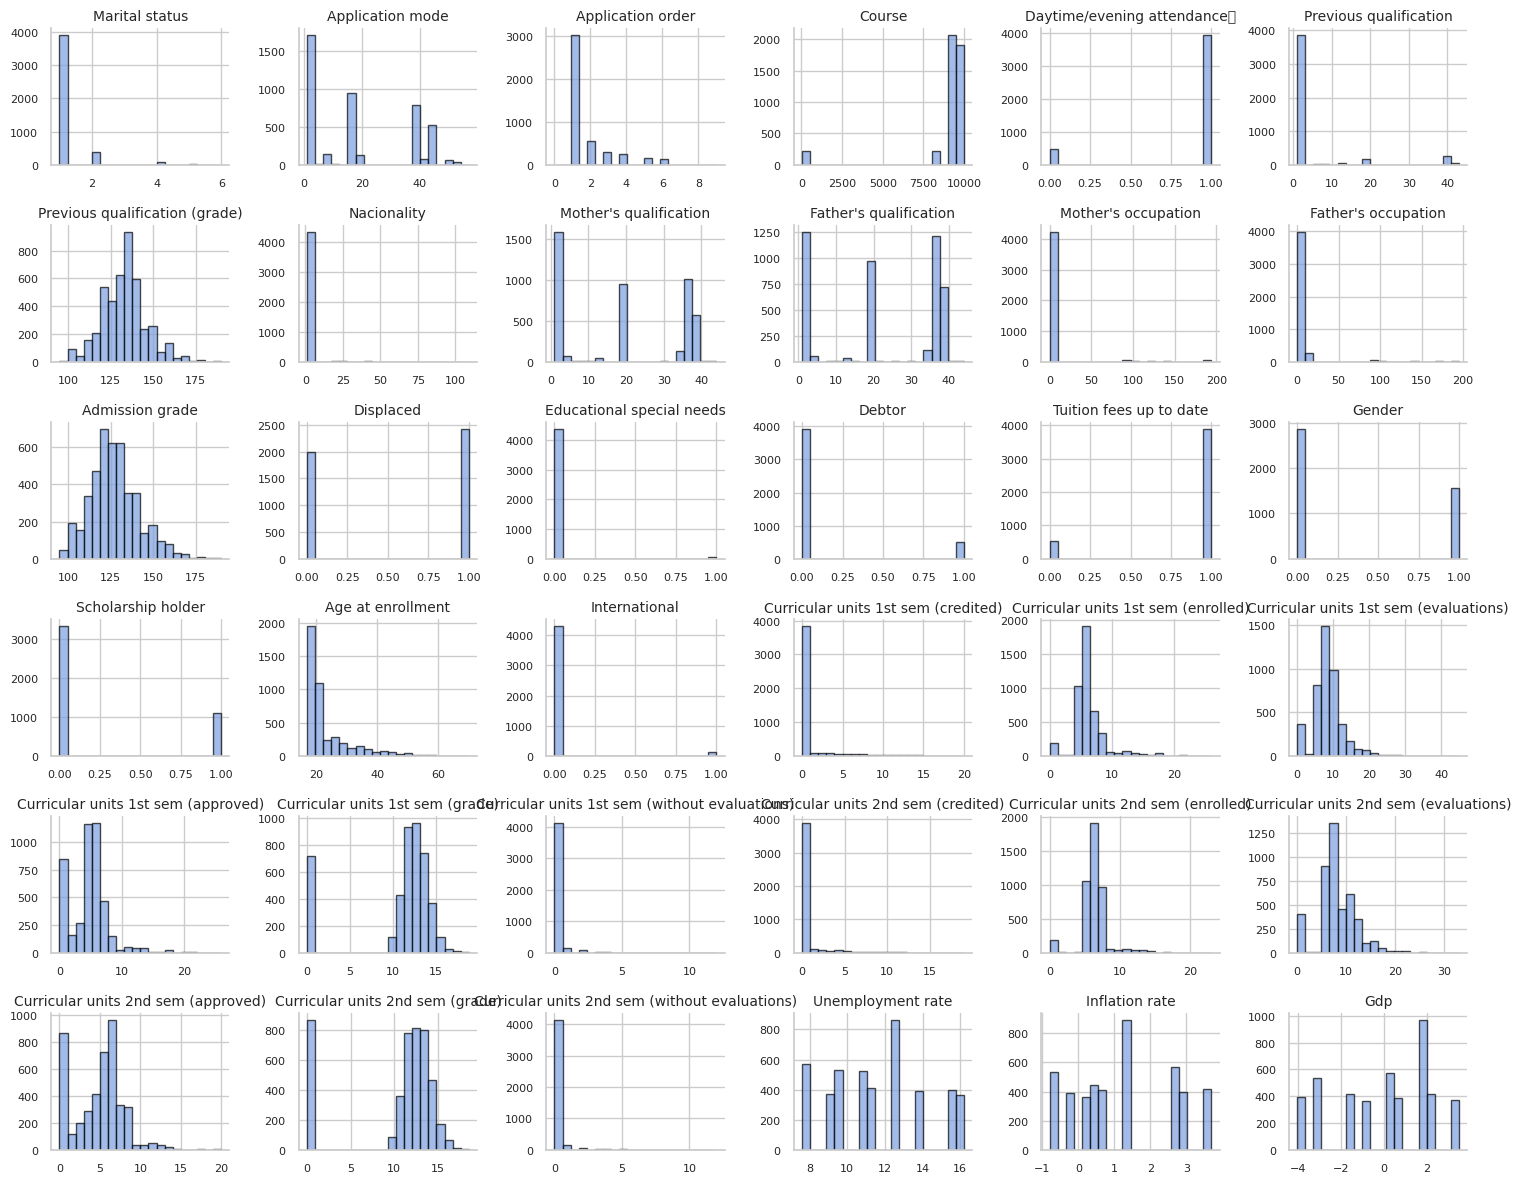

In [ ]:
fig, axes = plt.subplots(nrows=6, ncols=6, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)

# Plot histograms for each attribute
for ax, column in zip(axes.flatten(), data.columns):
    ax.hist(data[column], bins=20, color='#7b9fe0', alpha=0.7, edgecolor='black')
    ax.set_title(column.capitalize(), fontsize=10)
    ax.tick_params(axis='both', which='both', labelsize=8)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# Remove empty subplots
if data.shape[1] < 30:
    for ax in axes.flatten()[data.shape[1]:]:
        ax.remove()

plt.tight_layout()
plt.show()

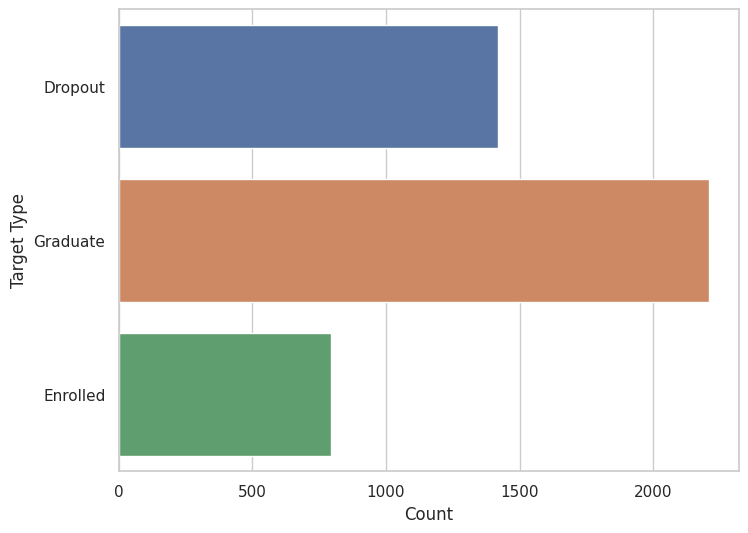

In [ ]:
sns.set(style="whitegrid")  # Optional: Set a seaborn style
plt.figure(figsize=(8, 6))  # Optional: Set the figure size

# Replace underscores with spaces in the 'Target' column
data1 = data.copy()
data1['Target'] = data1['Target']

sns.countplot(y='Target', data=data1, orient='h')

plt.xlabel('Count')  # Optional: Set the x-axis label
plt.ylabel('Target Type')  # Optional: Set the y-axis label

plt.show()

In [ ]:
legnByGeneration = data.groupby(['Target']).size()

In [ ]:
print(legnByGeneration)
data.shape

Target
Dropout     1421
Enrolled     794
Graduate    2209
dtype: int64


(4424, 37)

In [ ]:
label_encoder = LabelEncoder()
data['target_encode'] = label_encoder.fit_transform(data['Target'])

In [ ]:
label_counts = data['Target'].value_counts()
# Print the count of each label
print(label_counts)

Graduate    2209
Dropout     1421
Enrolled     794
Name: Target, dtype: int64


In [ ]:
data

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,target_encode
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
1,1,15,1,9254,1,1,160.0,1,1,3,...,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate,2
2,1,1,5,9070,1,1,122.0,1,37,37,...,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout,0
3,1,17,2,9773,1,1,122.0,1,38,37,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate,2
4,2,39,1,8014,0,1,100.0,1,37,38,...,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate,2
4420,1,1,2,9773,1,1,120.0,105,1,1,...,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout,0
4421,1,1,1,9500,1,1,154.0,1,37,37,...,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout,0
4422,1,1,1,9147,1,1,180.0,1,37,37,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate,2


In [ ]:
new_data= data.drop(labels = ["Target",'target_encode'],axis = 1)
new_data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0,0.000000,0,10.8,1.4,1.74
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,0,6,6,6,13.666667,0,13.9,-0.3,0.79
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,0,6,0,0,0.000000,0,10.8,1.4,1.74
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,0,6,10,5,12.400000,0,9.4,-0.8,-3.12
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,0,6,6,6,13.000000,0,13.9,-0.3,0.79


In [ ]:
label=data['target_encode']
label

0       0
1       2
2       0
3       2
4       2
       ..
4419    2
4420    0
4421    0
4422    2
4423    2
Name: target_encode, Length: 4424, dtype: int64

In [ ]:

new_data[:20].describe()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,20.000000,20.000000,20.000000,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,...,20.000000,20.0,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,1.100000,12.200000,1.800000,8917.95000,0.900000,3.950000,131.905000,4.050000,21.050000,25.25000,...,0.050000,0.0,5.850000,7.300000,4.000000,9.713190,0.350000,12.945000,1.380000,-0.371500
std,0.307794,15.602294,1.361114,2102.78706,0.307794,9.816608,13.428229,13.640015,14.229232,14.88155,...,0.223607,0.0,1.663066,4.402153,2.809757,5.844668,1.182103,2.606162,1.367903,2.543084
min,1.000000,1.000000,1.000000,171.00000,0.000000,1.000000,100.000000,1.000000,1.000000,1.00000,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,8.900000,-0.800000,-4.060000
25%,1.000000,1.000000,1.000000,9211.00000,1.000000,1.000000,122.000000,1.000000,15.000000,17.25000,...,0.000000,0.0,5.750000,5.750000,1.500000,8.250000,0.000000,10.800000,0.300000,-2.055000
50%,1.000000,1.000000,1.000000,9254.00000,1.000000,1.000000,135.500000,1.000000,19.000000,37.00000,...,0.000000,0.0,6.000000,7.500000,5.000000,12.325000,0.000000,13.300000,1.400000,-0.065000
75%,1.000000,17.250000,2.000000,9695.75000,1.000000,1.000000,138.250000,1.000000,37.000000,37.00000,...,0.000000,0.0,6.000000,8.000000,6.000000,13.541667,0.000000,15.500000,2.800000,1.740000
max,2.000000,53.000000,5.000000,9991.00000,1.000000,42.000000,160.000000,62.000000,38.000000,38.00000,...,1.000000,0.0,8.000000,17.000000,8.000000,14.545000,5.000000,16.200000,3.700000,3.510000


In [ ]:
from scipy.stats import zscore

# Perform z-score normalization on each column
df_normalized = new_data.apply(zscore)

In [ ]:
df_normalized

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
0,-0.294829,-0.095470,2.490896,-4.209520,0.350082,-0.35023,-0.804841,-0.126298,-0.036018,-0.669778,...,-0.199273,-0.282442,-2.838337,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
1,-0.294829,-0.209869,-0.554068,0.192580,0.350082,-0.35023,2.076819,-0.126298,-1.189759,-1.256427,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.659562,-0.199441,0.876222,-1.105222,0.347199
2,-0.294829,-1.010660,2.490896,0.103404,0.350082,-0.35023,-0.804841,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.105726,-2.042630,-1.471527,-1.963489,-0.199441,-0.287638,0.124386,0.765761
3,-0.294829,-0.095470,0.207173,0.444115,0.350082,-0.35023,-0.804841,-0.126298,1.181819,0.959802,...,-0.199273,-0.282442,-0.105726,0.490616,0.187165,0.416450,-0.199441,-0.813253,-1.466871,-1.375511
4,1.356212,1.162916,-0.554068,-0.408389,-2.856470,-0.35023,-2.473171,-0.126298,1.117723,1.024985,...,-0.199273,-0.282442,-0.105726,-0.522682,0.518904,0.531608,-0.199441,0.876222,-1.105222,0.347199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.294829,-1.010660,3.252137,0.444115,0.350082,-0.35023,-0.577342,-0.126298,-1.189759,-1.386793,...,-0.199273,-0.282442,-0.105726,-0.016033,0.187165,0.467631,-0.199441,1.476924,1.137005,-1.789667
4420,-0.294829,-1.010660,0.207173,0.444115,0.350082,-0.35023,-0.956508,14.916228,-1.189759,-1.386793,...,-0.199273,-0.282442,-0.105726,-0.522682,-0.808050,0.147747,-0.199441,-0.175007,-0.454253,0.889126
4421,-0.294829,-1.010660,-0.554068,0.311805,0.350082,-0.35023,1.621820,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,0.805144,0.237291,-1.139788,0.627573,-0.199441,0.876222,-1.105222,0.347199
4422,-0.294829,-1.010660,-0.554068,0.140722,0.350082,-0.35023,3.593483,-0.126298,1.117723,0.959802,...,-0.199273,-0.282442,-0.561161,-0.522682,0.187165,0.339678,-0.199441,-0.813253,-1.466871,-1.375511


In [ ]:
Y=label
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_normalized, Y, test_size = 0.3, random_state = 42,stratify=Y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Create a default KNN model
knn = KNeighborsClassifier()

# Get the parameters of the KNN model
params = knn.get_params()

print(params)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred1=knn.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred1, zero_division=1, digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7307    0.6862    0.7077       427
           1     0.3214    0.2647    0.2903       238
           2     0.7346    0.8100    0.7704       663

    accuracy                         0.6724      1328
   macro avg     0.5956    0.5869    0.5895      1328
weighted avg     0.6593    0.6724    0.6642      1328



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6724


In [ ]:
classes = data['Target'].unique()

<function matplotlib.pyplot.show(close=None, block=None)>

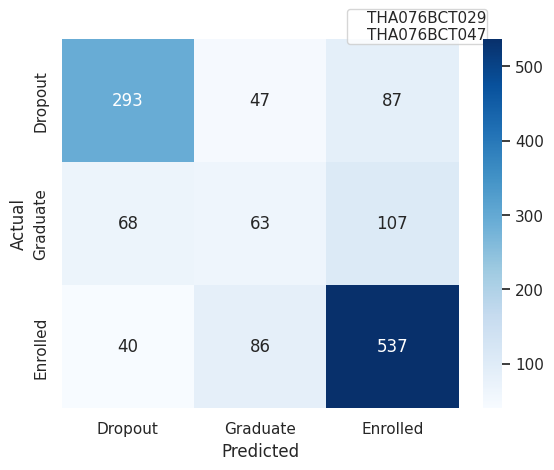

In [ ]:
conf = confusion_matrix(y_test, y_pred1)
# Set the colormap for the heatmap
cmap = 'Blues'
# Create a heatmap of the confusion matrix
sns.heatmap(conf, annot=True,cmap=cmap, xticklabels=classes, yticklabels=classes,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show

In [ ]:
cor=data.corr(method='pearson')
cor

<ipython-input-27-e6979ef28028>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor=data.corr(method='pearson')


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,target_encode
Marital status,1.000000,0.264006,-0.125854,0.046365,-0.274939,0.062529,-0.022406,-0.008843,0.193163,0.130353,...,0.062831,0.039026,0.022784,-0.043739,-0.071506,0.020426,-0.020338,0.008761,-0.027003,-0.089804
Application mode,0.264006,1.000000,-0.286357,0.065385,-0.304092,0.422411,-0.039020,-0.000661,0.118974,0.083276,...,0.238445,0.130046,0.167872,-0.071526,-0.115424,0.047983,0.089080,-0.016375,-0.022743,-0.221747
Application order,-0.125854,-0.286357,1.000000,0.059507,0.158657,-0.184315,-0.064484,-0.022416,-0.064956,-0.050288,...,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.098419,-0.011133,0.030201,0.089791
Course,0.046365,0.065385,0.059507,1.000000,-0.043151,0.006654,-0.081013,-0.033923,0.054543,0.050724,...,-0.089817,0.401539,0.278797,0.198032,0.348728,0.030816,0.007153,0.017710,-0.020265,0.034219
Daytime/evening attendance\t,-0.274939,-0.304092,0.158657,-0.043151,1.000000,-0.071871,0.052597,0.018530,-0.204767,-0.139894,...,-0.111953,0.000371,0.014610,0.034022,0.050493,-0.004229,0.061974,-0.024043,0.022929,0.075107
Previous qualification,0.062529,0.422411,-0.184315,0.006654,-0.071871,1.000000,0.104072,-0.029214,-0.013190,-0.006614,...,0.143031,0.056179,0.114850,-0.008632,0.000942,0.005102,0.111958,-0.063736,0.064069,-0.056039
Previous qualification (grade),-0.022406,-0.039020,-0.064484,-0.081013,0.052597,0.104072,1.000000,0.054088,-0.060670,-0.035234,...,-0.018489,-0.031649,-0.061355,0.050263,0.053239,-0.019015,0.045222,0.018710,-0.052620,0.103764
Nacionality,-0.008843,-0.000661,-0.022416,-0.033923,0.018530,-0.029214,0.054088,1.000000,-0.049946,-0.085282,...,-0.007278,-0.020113,-0.025721,-0.017880,-0.008497,-0.014041,-0.000651,-0.008922,0.034478,-0.014801
Mother's qualification,0.193163,0.118974,-0.064956,0.054543,-0.204767,-0.013190,-0.060670,-0.049946,1.000000,0.535140,...,0.042771,0.035150,0.021033,-0.014858,-0.031175,0.021305,-0.114351,0.059441,-0.083657,-0.043178
Father's qualification,0.130353,0.083276,-0.050288,0.050724,-0.139894,-0.006614,-0.035234,-0.085282,0.535140,1.000000,...,0.042666,0.024380,0.009514,0.005285,-0.008083,-0.007430,-0.077905,0.057633,-0.071610,-0.001393


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


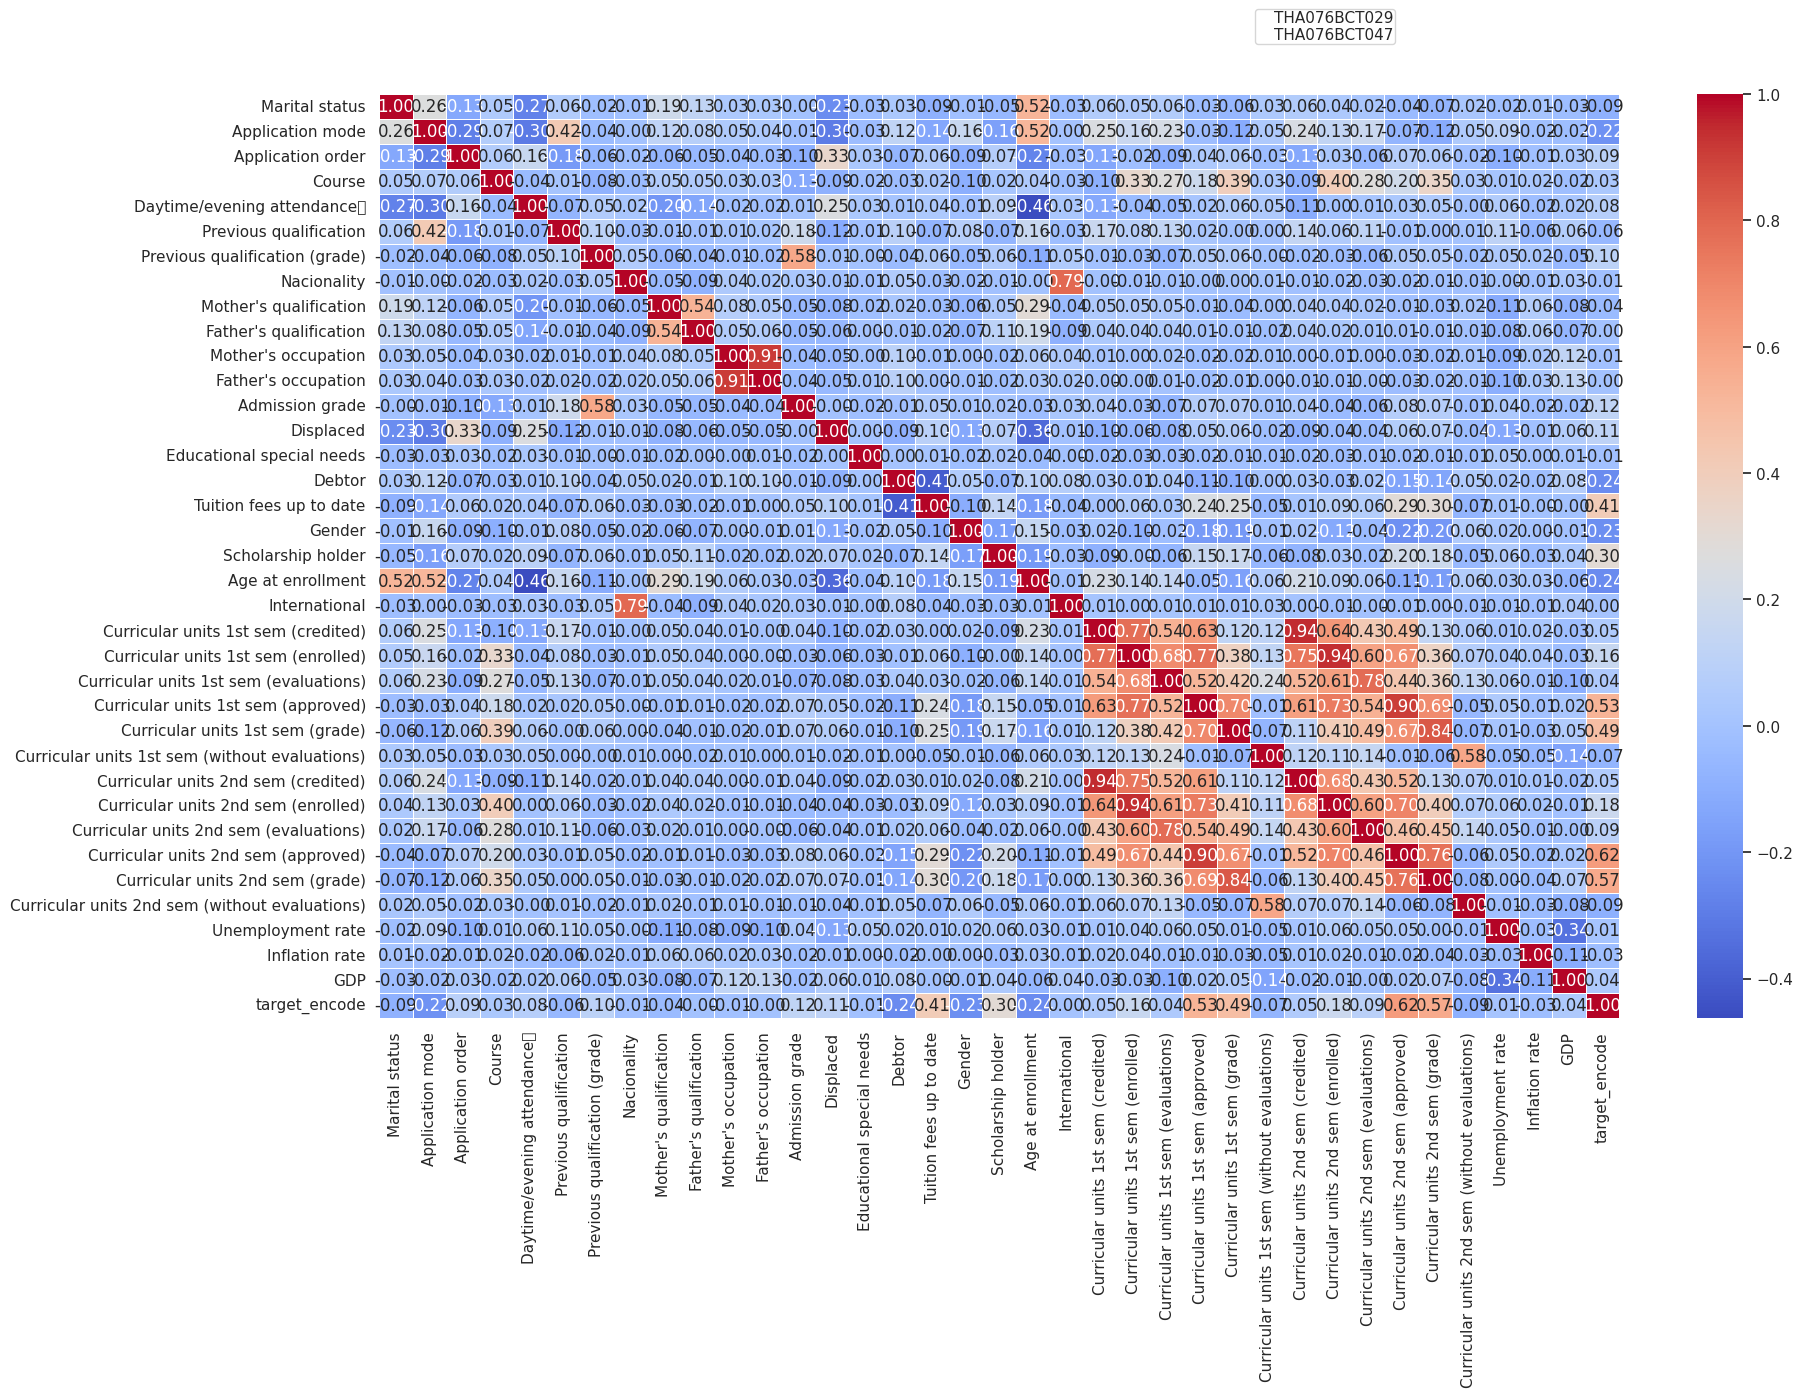

In [ ]:
plt.figure(figsize=(20, 12))

# Choose a color map for the heatmap (optional)
# You can find more colormaps at: https://matplotlib.org/stable/tutorials/colors/colormaps.html
cmap = 'coolwarm'

# Draw the heatmap
sns.heatmap(cor,annot = True, fmt=".2f",cmap=cmap,linewidths=0.5)

# Add a title to the heatmap
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)

# Rotate the x-axis labels for better readability (optional, adjust as needed)
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [ ]:
last_row = cor['target_encode']

# Print the last row
# print(last_row)
val=last_row.values[:-1]
print(val)
feat=cor.columns[:-1]
print(feat)

[-0.08980353 -0.22174658  0.08979091  0.03421883  0.0751065  -0.05603859
  0.1037637  -0.01480119 -0.04317772 -0.00139269 -0.00562856 -0.00189894
  0.12088916  0.11398557 -0.00735307 -0.2409989   0.40982675 -0.22926957
  0.29759529 -0.24343751  0.00393399  0.04814971  0.15597397  0.04436155
  0.52912326  0.48520739 -0.06870182  0.05400381  0.17584682  0.09272065
  0.62415746  0.56682728 -0.09402777  0.00862668 -0.02687406  0.04413469]
Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricula

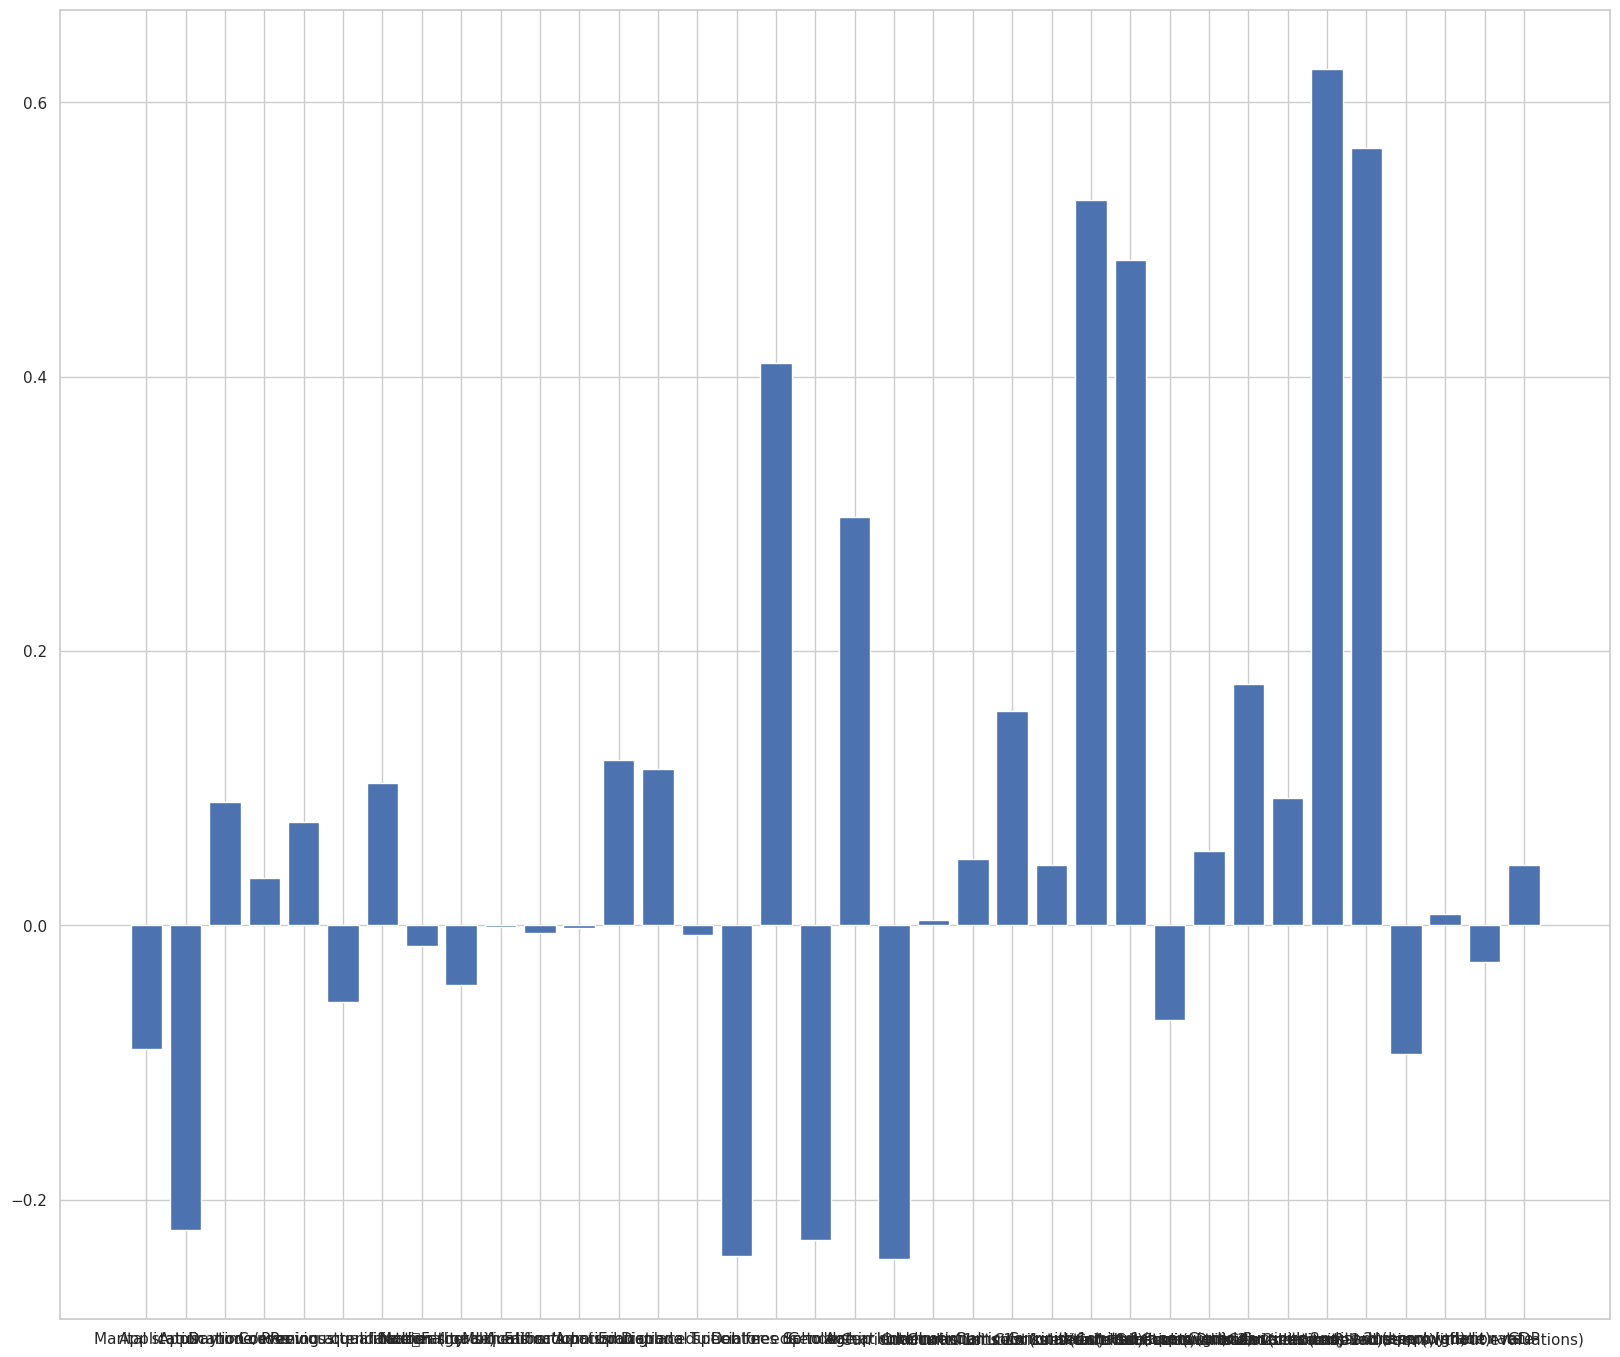

In [ ]:
fig = plt.figure(figsize =(20, 17))

# Horizontal Bar Plot
plt.bar(feat,val )

# Show Plot
plt.show()

In [ ]:
np.random.seed(10)
weights = np.random.rand(11)
feat=cor.columns[:-1]
print(feat)

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

In [ ]:
type(weights)

numpy.ndarray

In [ ]:
knn_model = KNeighborsClassifier(metric_params = {'weights':weights})

# Print the instantiated model
print(knn_model)

KNeighborsClassifier(metric_params={'weights': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982])})


In [ ]:
paramss = knn_model.get_params()

print(paramss)

{'algorithm': 'auto', 'leaf_size': 30, 'metric': 'minkowski', 'metric_params': {'weights': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982])}, 'n_jobs': None, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}


In [ ]:
knn_model.fit(X_train, y_train)

KNeighborsClassifier(metric_params={'weights': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982])})

In [ ]:
y_pred2=knn_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:234: UserWarning: Some metric_kwargs have been passed ({'weights': array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982])}) but aren't usable for this case (EuclideanArgKmin64) and will be ignored.
  neigh_ind = self.kneighbors(X, return_distance=False)


In [ ]:
from sklearn.metrics import classification_report


report = classification_report(y_test, y_pred2, zero_division=1,digits=4)
print(report)

              precision    recall  f1-score   support

           0     0.7307    0.6862    0.7077       427
           1     0.3214    0.2647    0.2903       238
           2     0.7346    0.8100    0.7704       663

    accuracy                         0.6724      1328
   macro avg     0.5956    0.5869    0.5895      1328
weighted avg     0.6593    0.6724    0.6642      1328



In [ ]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred2)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.6724


<function matplotlib.pyplot.show(close=None, block=None)>

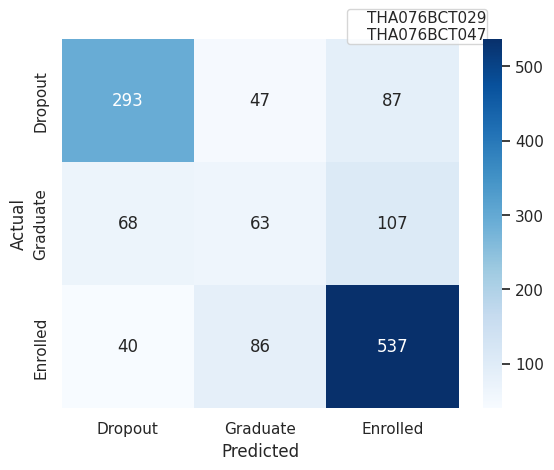

In [ ]:
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, y_pred2)
# Set the colormap for the heatmap
cmap = 'Blues'
# Create a heatmap of the confusion matrix
sns.heatmap(conf, annot=True,cmap=cmap, xticklabels=classes, yticklabels=classes,fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
legend_handles = [
    plt.Line2D([], [], color='black', marker='o', markersize=10, label='THA076BCT029\nTHA076BCT047',alpha = 0), # Remove the scatterplot marker from the legend
]
plt.legend(handles=legend_handles, loc='upper left', bbox_to_anchor=(0.7, 1.1), ncol=len(legend_handles), handlelength=0.4, borderpad=0.07)
plt.show

In [ ]:
weights

array([0.77132064, 0.02075195, 0.63364823, 0.74880388, 0.49850701,
       0.22479665, 0.19806286, 0.76053071, 0.16911084, 0.08833981,
       0.68535982])

In [ ]:
label_counts = label.value_counts()
print(label_counts)

2    2209
0    1421
1     794
Name: target_encode, dtype: int64


Average Accuracy for k=1: 0.6535
Average Accuracy for k=3: 0.6878
Average Accuracy for k=5: 0.6971
Average Accuracy for k=7: 0.7071
Average Accuracy for k=9: 0.7102
Average Accuracy for k=11: 0.7116
Average Accuracy for k=13: 0.7091
Average Accuracy for k=15: 0.7093
Average Accuracy for k=17: 0.7134
Average Accuracy for k=19: 0.7116
Average Accuracy for k=21: 0.7093
Average Accuracy for k=23: 0.7118
Average Accuracy for k=25: 0.7113
Average Accuracy for k=27: 0.7125
Average Accuracy for k=29: 0.7104


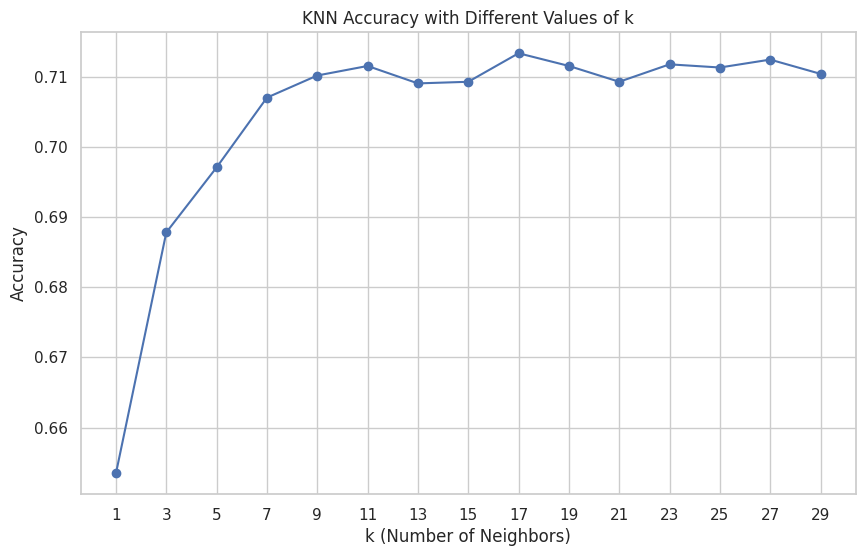

Optimum value of k: 17
Accuracy with optimum k: 0.71338


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Step 1: Load the dataset and split into features (X) and labels (y)
# x_data = data.drop(['Target'],axis = 1)
X, y = df_normalized, label

# Step 2: Choose a range of k values to try with step size 2
k_values = list(range(1, 31, 2))  # For example, trying odd k values from 1 to 30

# Step 3: Perform k-Fold Cross-Validation for each k value and collect accuracy scores
accuracy_scores = []
for k in k_values:
    # Instantiate KNN model
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # Perform k-fold cross-validation and get accuracy scores
    cv_scores = cross_val_score(knn_model, X, y, cv=10)  # Using 10-fold cross-validation

    # Get the mean accuracy from cross-validation
    accuracy = np.mean(cv_scores)
    print(f"Average Accuracy for k={k}: {accuracy:.4f}")
    accuracy_scores.append(accuracy)

# Step 4: Find the k value with the highest accuracy
best_k = k_values[np.argmax(accuracy_scores)]
best_accuracy = max(accuracy_scores)

# Step 5: Plot the relationship between k values and accuracy scores
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('KNN Accuracy with Different Values of k')
plt.xticks(k_values)
plt.grid(True)
plt.show()

print(f"Optimum value of k: {best_k}")
print(f"Accuracy with optimum k: {best_accuracy:.5f}")